<a href="https://colab.research.google.com/github/BraiLoza/DataScience.proyects/blob/main/Proyecto_Banco_BrianLoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🔁 **Proyecto Rotacion de clientes bancarios**🔁

## ***`El problema`***💥


> El banco comenzó por examinar detenidamente sus datos y se dieron cuenta que enfrentaba un problema que preocupaba a su equipo directivo: la rotación de clientes. La fuga de clientes, también conocida como "churn".



> Crearon un conjunto de datos que incluía diversas variables que podrían estar relacionadas con la rotación de clientes. Estas variables incluían el puntaje crediticio, la ubicación geográfica, el género, la edad, la antigüedad como cliente, el saldo en cuentas, el número de productos adquiridos, la posesión de tarjeta de crédito, la actividad como miembro y el salario estimado.


## ***`El analisis`***📚



> Al analizar los datos tendremos una mejor perspectiva de que vamos analizar, donde queremos llegar, pero principalmente vamos hacer una **`Analisis exploratorio de datos`**, con este podremos ver como se conforman las relaciones que desearemos buscar y que modelos de **`Machine Learning `** son los mejores para aplicar en el siguiente problema



## ***`¿Qué buscamos responder?`*** 🤔


*   Que porcentaje de clientes es la que rota?
*   Cuantos clientes tienen cada pais?
*   Que pais tiene mas rotacion en relacion a clientes?



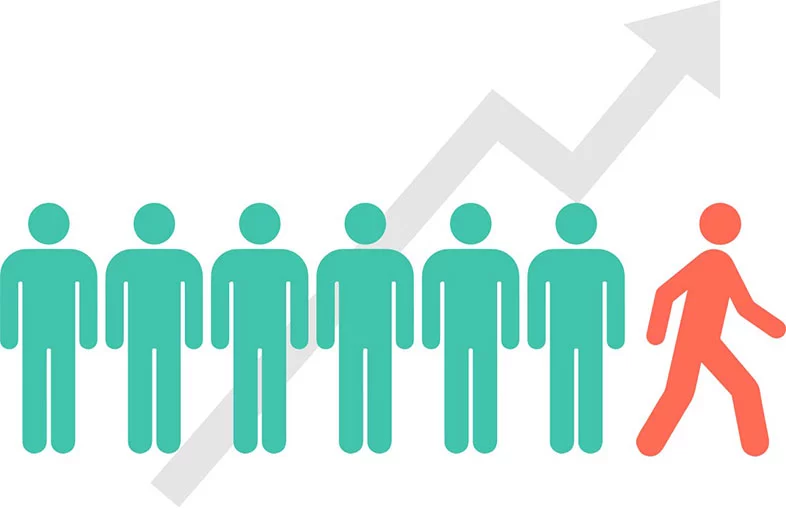


**RowNumber** — corresponde al número de registro (fila) y no tiene ningún efecto en la salida. Esta columna se eliminará.

**CustomerId** — contiene valores aleatorios y no tiene ningún efecto en la decisión del cliente de abandonar el banco. Esta columna se eliminará.

**Surname**— el apellido de un cliente no tiene impacto en su decisión de abandonar el banco. Esta columna se eliminará.

**CreditScore** — puede tener un efecto en la rotación de clientes, ya que un cliente con un puntaje de crédito más alto es menos probable que abandone el banco.

**Geografía** — la ubicación de un cliente puede afectar su decisión de abandonar el banco. Mantendremos esta columna.

**Género** — es interesante explorar si el género juega un papel en que un cliente abandone el banco. También incluiremos esta columna.

**Edad** — esto es ciertamente relevante, ya que es menos probable que los clientes mayores abandonen su banco en comparación con los más jóvenes.

**Tenure** — se refiere al número de años que el cliente ha sido cliente del banco. Normalmente, los clientes más antiguos son más leales y menos propensos a abandonar un banco.

**Balance** — también es un indicador muy bueno de la rotación de clientes, ya que las personas con un saldo más alto en sus cuentas son menos propensas a abandonar el banco en comparación con aquellas con saldos más bajos.

**NumOfProducts** — se refiere al número de productos que un cliente ha adquirido a través del banco.

**HasCrCard**— indica si un cliente tiene o no una tarjeta de crédito. Esta columna también es relevante, ya que las personas con tarjeta de crédito son menos propensas a abandonar el banco. (0=No,1=Sí)

**IsActiveMember** — los clientes activos son menos propensos a abandonar el banco, por lo que lo mantendremos. (0=No,1=Sí)

**EstimatedSalary** — al igual que con el saldo, las personas con salarios más bajos son más propensas a abandonar el banco en comparación con las que tienen salarios más altos.

**Exited** — si el cliente abandonó o no el banco. Esto es lo que debemos predecir. (0=No,1=Sí)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


***`importamos librerias `***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import joblib

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.target import FeatureCorrelation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from sklearn.ensemble import VotingClassifier
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None #to show all rows
pd.options.display.max_columns = None #to show all columns

import random
import xgboost as xgb
import keras
import warnings
import plotly.express as px
import pickle
sys.modules['sklearn.externals.joblib'] = joblib
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

***`Cargamos el dataset`***

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Churn_Modelling (2).csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


***`exploramos la integridad de los datos`***

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

*`Eliminamos columnas que en este caso no nos van a ser utiles`*

In [ ]:
df.rename(columns={'Exited':'Churn'}, inplace=True)

***`Cambiamos a la columna de los clientes Exited por los de rotación`***

In [ ]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Churn                 2
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

*`vemos cuantas personas son o fueron clientes del banco, dividiendolos por paises.`*

In [ ]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

La rotacion nos va a demostrar.


0.   son clientes activos
1.   cambiaron de banco




In [ ]:
df.corr().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# 🔍 ***`Analisis exploratorio de datos`***

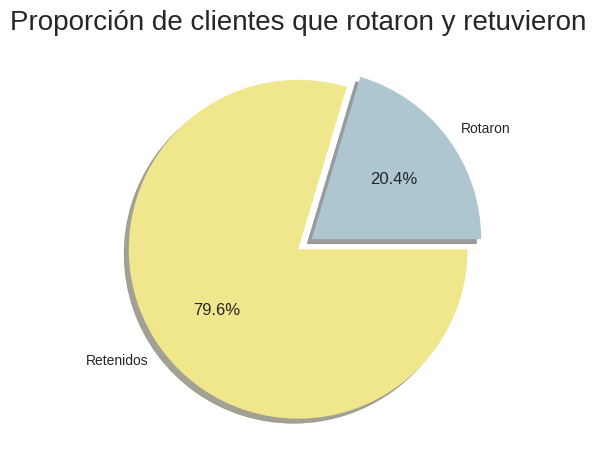

In [ ]:
mpl_color =['#AEC6CF', '#F0E68C']
pie_data = [df[df["Churn"] == 1].shape[0], df[df["Churn"] == 0].shape[0]]
pie_labels = ["Rotaron", "Retenidos"]

fig, ax = plt.subplots()
ax.pie(pie_data, labels=pie_labels, explode=[0.1, 0], shadow=True, colors=mpl_color, autopct="%.1f%%")
plt.title("Proporción de clientes que rotaron y retuvieron", size=20)
plt.show()



*`en este grafico de torta, podemos ver que el 20 % de los clientes rotaron `*

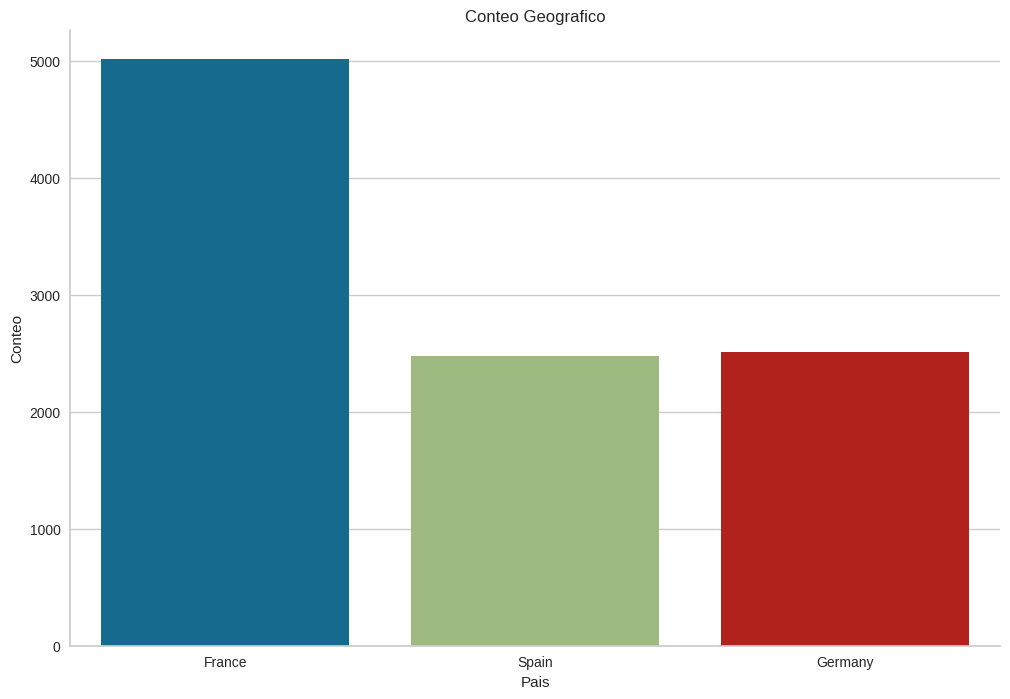

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Geography", data=df)
plt.title('Conteo Geografico')
plt.xlabel('Pais')
plt.ylabel('Conteo')
sns.despine()
plt.show()

*`Grafico de barras que muestra los clientes por pais`*

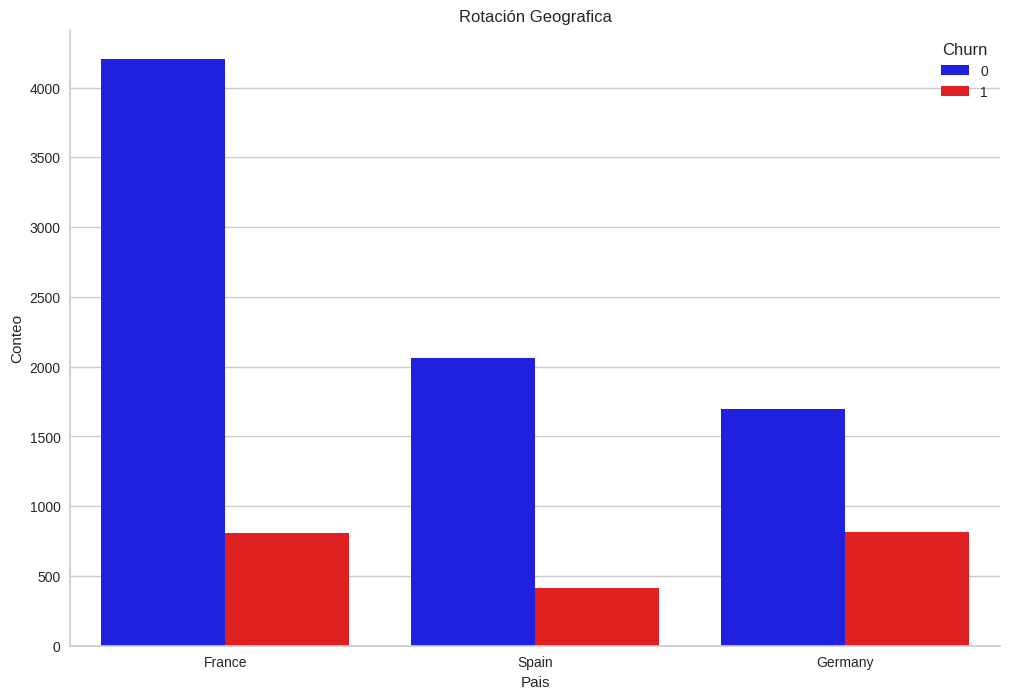

In [ ]:
mpl_color =['blue', 'red']
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Geography", data=df, hue= 'Churn', palette= mpl_color)
plt.title('Rotación Geografica')
plt.xlabel('Pais')
plt.ylabel('Conteo')
sns.despine()
plt.show()

*`vemos que Francia representa el pais con mas clientes segun los datos`*

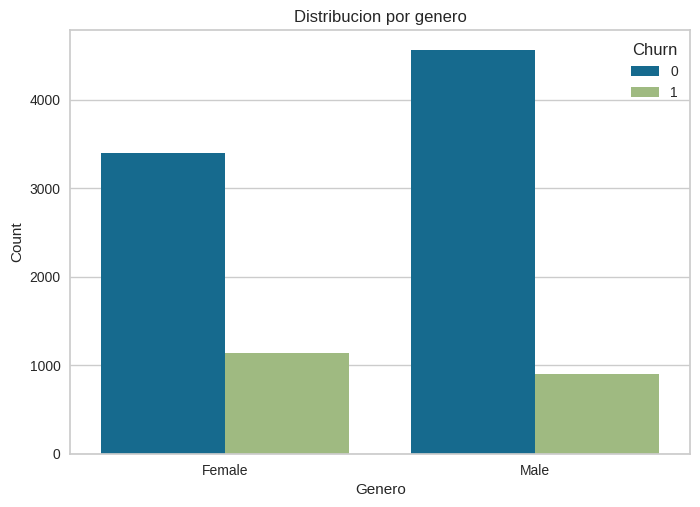

In [ ]:
sns.countplot(x = 'Gender', data = df, hue = 'Churn')
plt.title('Distribucion por genero')
plt.xlabel('Genero')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

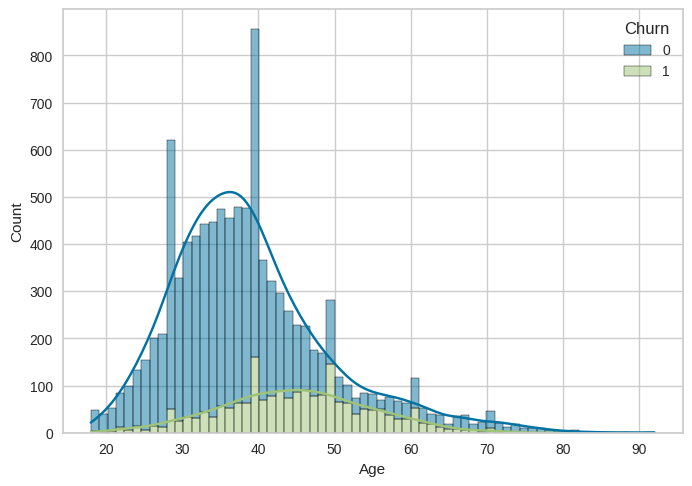

In [ ]:
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack",kde=True)

## ***`Histograma`***


Este grafico visualiza la distribución de edades y el conteo de rotación de los clientes. La mayoría de los clientes pertenecen al grupo de edades de 30 a 40 años. Sin embargo, el conteo de rotación de clientes es más alto para aquellos de 40 y 50 años. Además, los clientes del grupo de edades de 20 a 25 años tienen el conteo más bajo de rotación. Por lo tanto, la edad desempeña un papel significativo en la rotación de clientes, ya que los adultos tienen más probabilidades de abandonar en comparación con los adultos jóvenes con un conteo mínimo de rotación.

<Axes: xlabel='Churn', ylabel='Balance'>

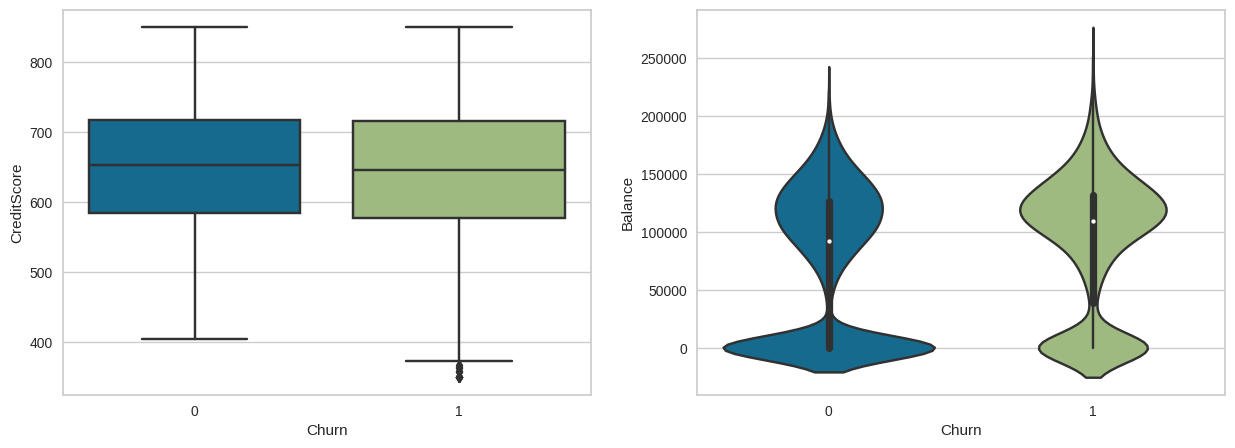

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x="Churn" , y="CreditScore", data=df, ax=ax[0])
sns.violinplot(x="Churn" , y="Balance", data=df, ax=ax[1])

## ***`boxplot y violinplot`***


 muestran la distribución del puntaje crediticio de los clientes junto con su rotación. En el boxplot, la mediana tanto de los clientes que abandonan como de los que no abandonan es casi la misma. Además, la forma del violinplot es similar tanto para los clientes que abandonan como para los que no. Sin embargo, algunos clientes que abandonan tienen un puntaje de balance bajo.

<Axes: xlabel='Age', ylabel='Balance'>

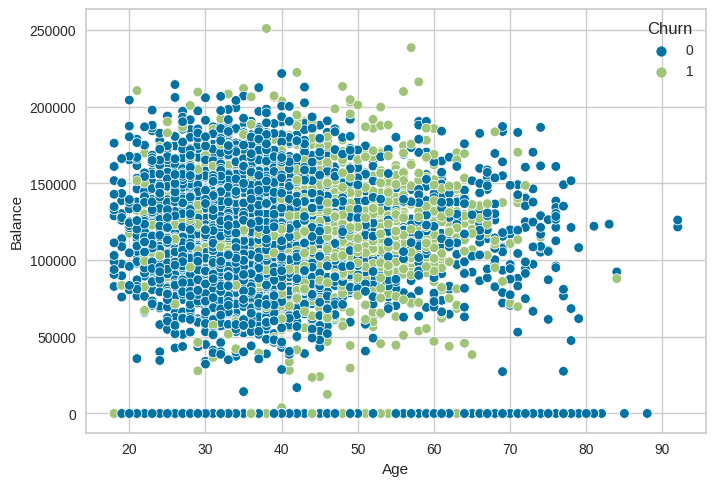

In [ ]:
sns.scatterplot(x='Age', y='Balance', hue='Churn', data=df)

### ***`Pausa`***


> Llegando a este punto vemos que muchos de los clientes tienen un balance de un 0%, significa que son clientes no representan ingresos significativos al banco y buscamos la retencion de clientes que tengan potencial de crecer o que ya esten en un mejor nivel adquisitivo


In [ ]:
df_new = df[df['Balance'] > 50000]


<Axes: xlabel='Age', ylabel='Balance'>

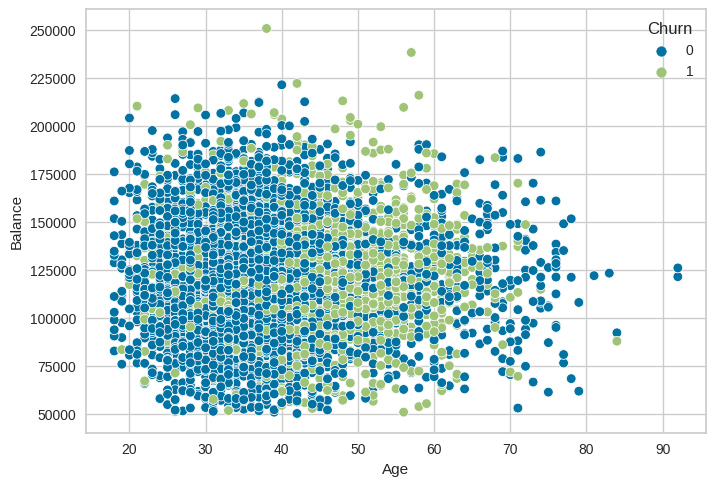

In [ ]:
sns.scatterplot(x='Age', y='Balance', hue='Churn', data=df_new)

# ***`🔍Analisis exploratorio del nuevo dataframe`***

In [ ]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [ ]:
df_new.shape

(6308, 11)

el data frame se redujo a 6308 filas con 11 columnas


In [ ]:
df_new['Geography'].value_counts()

France     2555
Germany    2490
Spain      1263
Name: Geography, dtype: int64

Francia era el país con mas clientes, pero la mayoria de sus clientes era de ingresos bajos. El nuevo data frame es mas equitativo

In [ ]:
df_new['Gender'].value_counts()

Male      3462
Female    2846
Name: Gender, dtype: int64

In [ ]:
counts = df_new.groupby(['Geography', 'Churn']).size()

result_df = counts.reset_index(name='Count')

print(result_df)

  Geography  Churn  Count
0    France      0   2102
1    France      1    453
2   Germany      0   1676
3   Germany      1    814
4     Spain      0   1019
5     Spain      1    244


Separamos por país y por la rotacion que representan, en este caso en proporciones Francia es el pais que mejor retiene a los clientes de buen poder adquisitivo

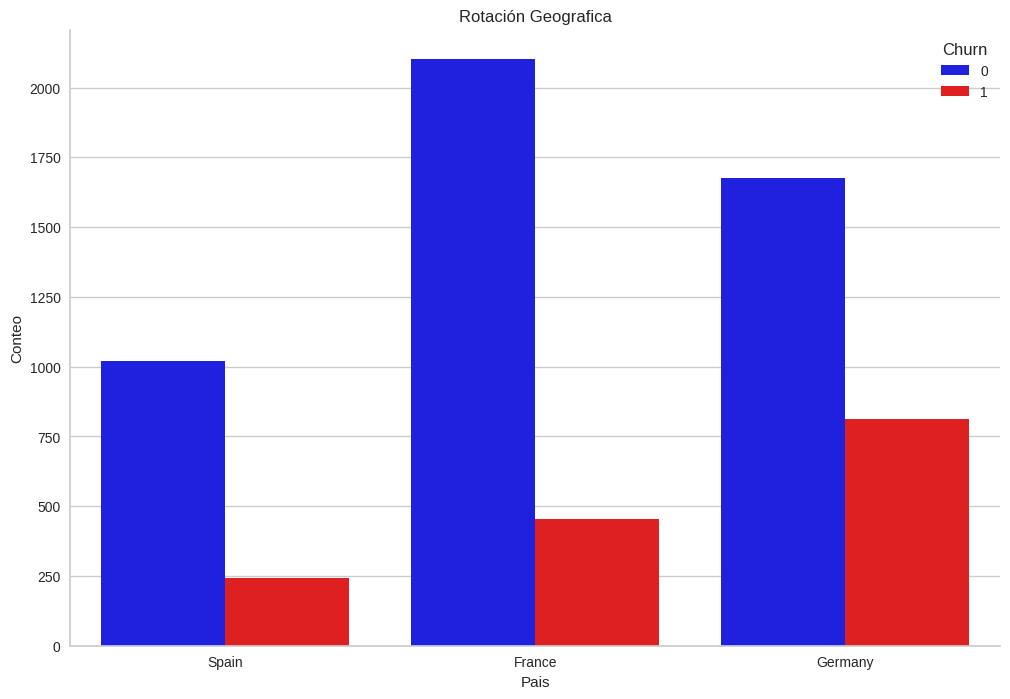

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Geography", data=df_new, hue= 'Churn', palette= mpl_color)
plt.title('Rotación Geografica')
plt.xlabel('Pais')
plt.ylabel('Conteo')
sns.despine()
plt.show()

# ***`🔁procesamiento de datos`***

*`Realizamos un get dummies para tener un mejor manejo de los datos `*

In [ ]:
df1 = pd.get_dummies(data=df_new, columns=['Geography'], drop_first = True)
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Churn',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

***`Realizamos un Label Encoder para transformar la variable genero a una variable numerica, en este caso`***

0: Hombre   
1: Mujer

In [ ]:
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])

In [ ]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_Germany,Geography_Spain
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,1
7,376,0,29,4,115046.74,4,1,0,119346.88,1,1,0


*`La normalizacion lo que facilita la comparación y la identificación de patrones.`*

In [ ]:
scaler = StandardScaler()
df1[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df1[['CreditScore','Balance','EstimatedSalary']])

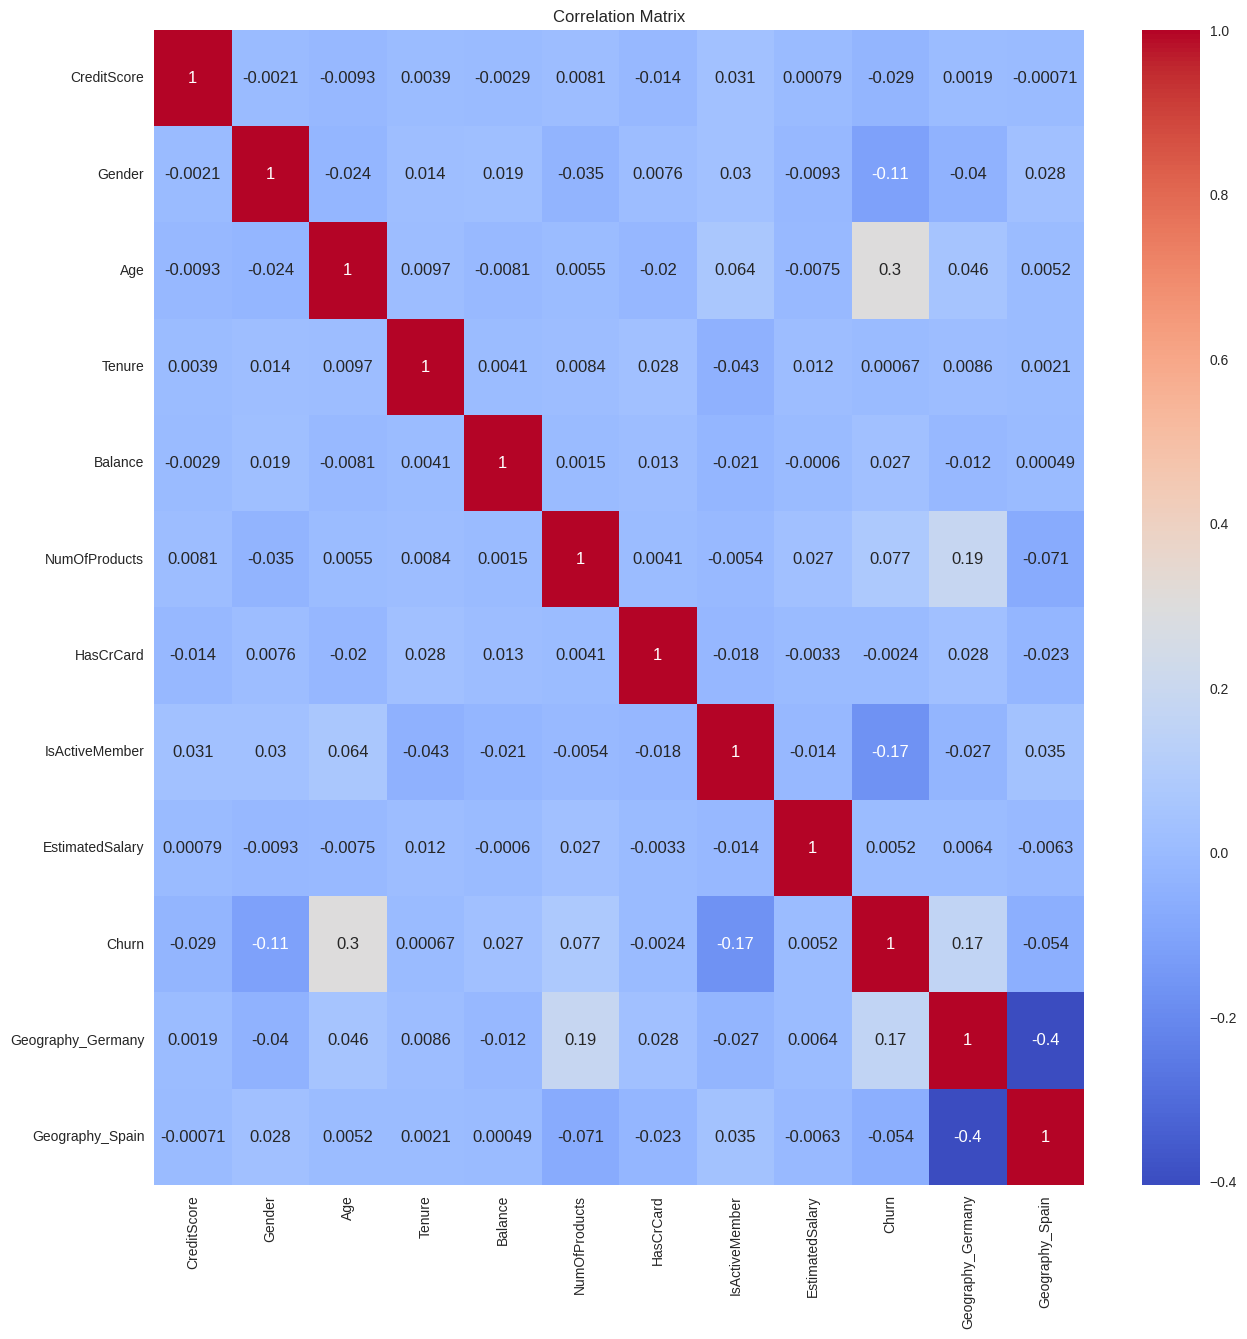

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

*`El mapa de calor muestra la relacion que tienen entre si los datos, es decir los valores deben acercarse a 1 para que tengan mayor relacion entre ellos.`*

# ***` Entrenamos los datos 💪`***

In [ ]:
X = df1.drop(columns=['Churn'])
y = df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('\nDatos de entrenamiento\n')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('\n\nDatos de prueba\n')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)
print('\n')


Datos de entrenamiento

X train shape:  (4415, 11)
Y train shape:  (4415,)


Datos de prueba

X test shape:  (1893, 11)
Y test shape:  (1893,)




In [ ]:
svc = SVC()

svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, svc_pred)
precision = precision_score(y_test, svc_pred, average='macro')
recall = recall_score(y_test, svc_pred, average='macro')
f1 = f1_score(y_test, svc_pred, average='macro')

print("Precisión del modelo SVC:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión del modelo SVC: 0.7427363972530375
Precisión: 0.37136819862651876
Recall: 0.5
F1-score: 0.42618975447105184


*`Matriz de confusion de SVC`*

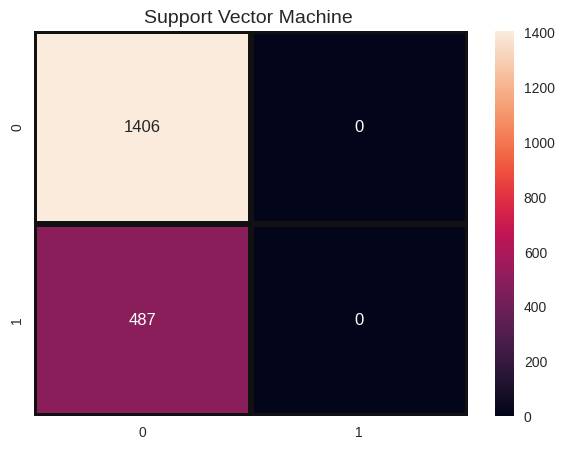

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, svc_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Support Vector Machine ",fontsize=14)
plt.show()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

accuracy = accuracy_score(y_test, knn_predict)
precision = precision_score(y_test, knn_predict, average='macro')
recall = recall_score(y_test, knn_predict, average='macro')
f1 = f1_score(y_test, knn_predict, average='macro')
print("Precisión del modelo KNN:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión del modelo KNN: 0.7733755942947702
Precisión: 0.7007687645987013
Recall: 0.6461169642570269
F1-score: 0.6609692366331587


*`Matriz de confusion de Knreighbors Classifier`*

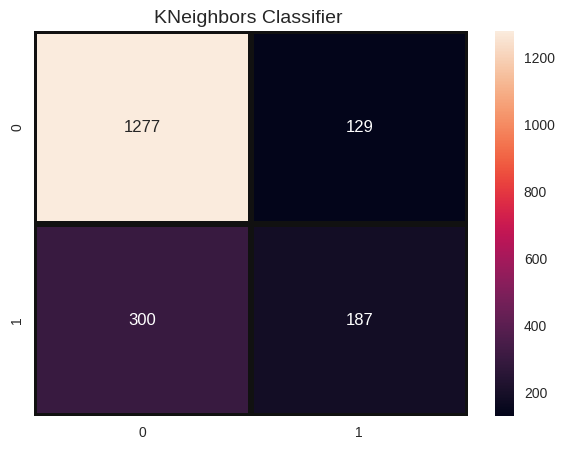

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, knn_predict),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("KNeighbors Classifier ",fontsize=14)
plt.show()

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, dtree_pred)
precision = precision_score(y_test, dtree_pred, average='macro')
recall = recall_score(y_test, dtree_pred, average='macro')
f1 = f1_score(y_test, dtree_pred, average='macro')

print("Precisión del modelo de árbol de decisión:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión del modelo de árbol de decisión: 0.7469624933967248
Precisión: 0.6724064584064584
Recall: 0.6793377458296943
F1-score: 0.6755714416053498


*`Matriz de confusion del Decision Tree Classifier`*

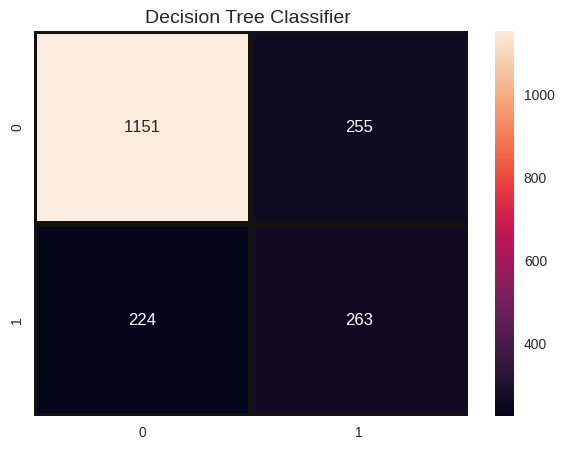

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, dtree_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Decision Tree Classifier ",fontsize=14)
plt.show()

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

accuracy = accuracy_score(y_test, rfc_predict)
precision = precision_score(y_test, rfc_predict, average='macro')
recall = recall_score(y_test, rfc_predict, average='macro')
f1 = f1_score(y_test, rfc_predict, average='macro')
print("Precisión del modelo RFC:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión del modelo RFC: 0.8314844162704702
Precisión: 0.8105900816070308
Recall: 0.7167755673105289
F1-score: 0.7441472443376932


*`Matriz de confusion del Random forest Classifier`*

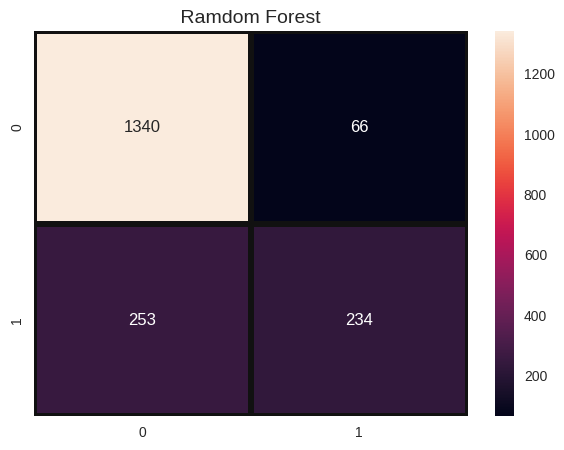

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, rfc_predict),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" Ramdom Forest ",fontsize=14)
plt.show()

In [ ]:
xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred, average='macro')
recall = recall_score(y_test, xgb_pred, average='macro')
f1 = f1_score(y_test, xgb_pred, average='macro')

# Imprimir resultados
print("Precisión del modelo XGBoost:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precisión del modelo XGBoost: 0.8203909138932911
Precisión: 0.7782881173317029
Recall: 0.7180315514909701
F1-score: 0.7385749936636058


*`Matriz de confusion de XGB Classifier`*

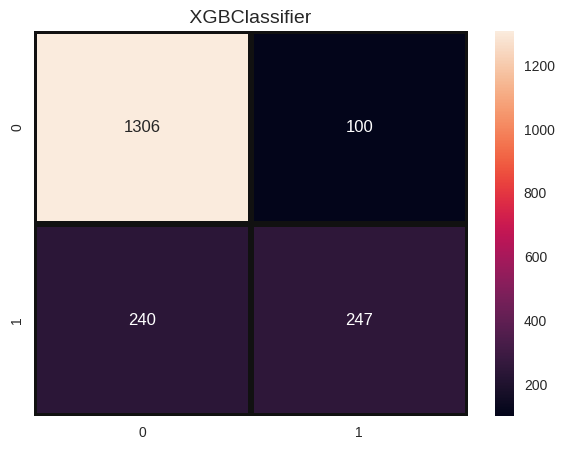

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, xgb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" XGBClassifier ",fontsize=14)
plt.show()

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred, average='macro')
recall = recall_score(y_test, gb_pred, average='macro')
f1 = f1_score(y_test, gb_pred, average='macro')

# Imprimir resultados
print("Precisión del modelo XGBoost:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión del modelo XGBoost: 0.8330692023243529
Precisión: 0.8154409113086273
Recall: 0.71717134837204
F1-score: 0.7453574262449726


*`Matriz de confusion de GB Classifier`*

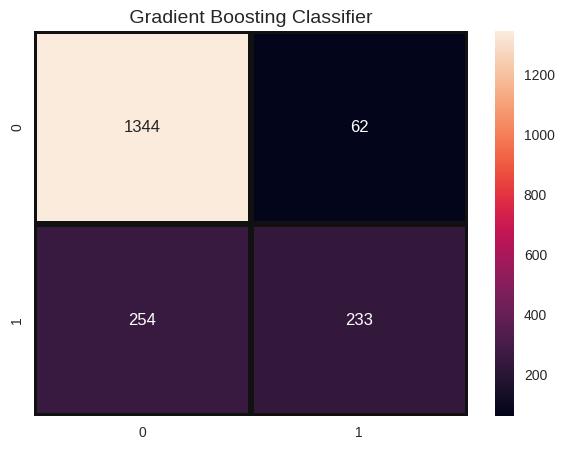

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" Gradient Boosting Classifier ",fontsize=14)
plt.show()

In [ ]:
clf1 = GradientBoostingClassifier()
clf2 = XGBClassifier()
clf3 = KNeighborsClassifier()
eclf1 = VotingClassifier(estimators=[('Gradient Boosting Classifier', clf1), ('XGB Classifier', clf2), ('KNeighbors Classifier', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score " )
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8309561542525092


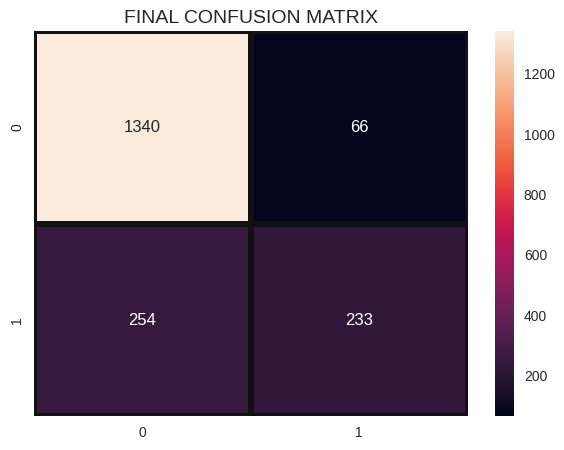

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

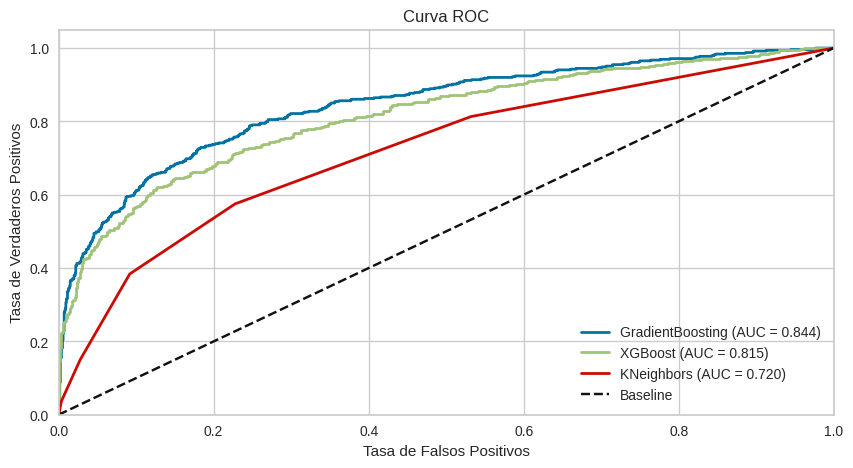

In [ ]:
models = {
    'GradientBoosting': clf1,
    'XGBoost': clf2,
    'KNeighbors': clf3,
    }

fig, ax = plt.subplots(figsize=(10, 5))

#grafico roc
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2, label='{} (AUC = {:.3f})'.format(model_name, roc_auc))

# Linea de referencia
ax.plot([0, 1], [0, 1], 'k--', label='Baseline')

ax.set_title('Curva ROC')
ax.set_xlabel('Tasa de Falsos Positivos')
ax.set_ylabel('Tasa de Verdaderos Positivos')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(loc="lower right")
plt.grid(True)

plt.show()


# ***`Conclusión`***

Repasando un poco todo el proyecto, podemos ver que lo llevamos a cabo hasta el final.

1. Exploramos el dataset y verificamos la integridad del mismo, es decir, si tenía valores repetidos, nulos y si teníamos datos que no serían relevantes para el estudio. Decidimos eliminarlos y quedarnos con un dataset más limpio para trabajar.

2. En el Análisis Exploratorio de Datos, verificamos la estructura del conjunto de datos. Examinamos el porcentaje de rotación, clientes y rotación por país, por edad, por género e ingresos.

3. Pausamos el proyecto para simular una situación más realista, es decir, el banco quería ofrecer créditos altos a cierto nicho de clientes, aquellos que tuvieran un saldo >= a 50.000. Por lo tanto, creamos un nuevo dataset que exploramos y analizamos.

4. Entrenamos los datos y calculamos las puntuaciones de precisión utilizando modelos de aprendizaje automático como Regresión Logística, KNN, SVM, Bosques Aleatorios, XGBoost, etc. Luego, optimizamos los hiperparámetros de XGBoost y LightGBM para aumentar la puntuación de precisión.

5. Resultado final: El modelo creado como resultado de la optimización de hiperparámetros del GradientBoostingClassifier se convirtió en el modelo con la puntuación de precisión máxima del 84%.






# ***`                                        Muchas gracias por la atención y llegar al final del proyecto!`***